In [1]:
import sys
sys.path.append("..")

In [2]:
from Datasets.dataframe_sentinel1 import sentinelOne2df
from Datasets.dataframe_sentinel2 import sentinelTwo2df
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

/home/mathys/.local/lib/python3.10/site-packages/matplotlib/projections/__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "


In [3]:
Cati2018_vv_vh_df = sentinelOne2df("../Sentinel1_Images_Catillon/2018").make_df()
Cati2019_vv_vh_df = sentinelOne2df("../Sentinel1_Images_Catillon/2019").make_df()
Cati2020_vv_vh_df = sentinelOne2df("../Sentinel1_Images_Catillon/2020").make_df()
Cati2021_vv_vh_df = sentinelOne2df("../Sentinel1_Images_Catillon/2021").make_df()
Cati2022_vv_vh_df = sentinelOne2df("../Sentinel1_Images_Catillon/2022").make_df()
Cati2023_vv_vh_df = sentinelOne2df("../Sentinel1_Images_Catillon/2023").make_df()
Cati2024_vv_vh_df = sentinelOne2df("../Sentinel1_Images_Catillon/2024").make_df()

In [4]:
Cati2018_ndvi_df = sentinelTwo2df("../Sentinel2_Images_Catillon/2018").make_df()
Cati2019_ndvi_df = sentinelTwo2df("../Sentinel2_Images_Catillon/2019").make_df()
Cati2020_ndvi_df = sentinelTwo2df("../Sentinel2_Images_Catillon/2020").make_df()
Cati2021_ndvi_df = sentinelTwo2df("../Sentinel2_Images_Catillon/2021").make_df()
Cati2022_ndvi_df = sentinelTwo2df("../Sentinel2_Images_Catillon/2022").make_df()
Cati2023_ndvi_df = sentinelTwo2df("../Sentinel2_Images_Catillon/2023").make_df()
Cati2024_ndvi_df = sentinelTwo2df("../Sentinel2_Images_Catillon/2024").make_df()

For 2022-09-24 00:00:00	> 'NoneType' object is not subscriptable


In [5]:
Cati2018_df = pd.merge(Cati2018_ndvi_df, Cati2018_vv_vh_df, on="Date", how="inner")
Cati2019_df = pd.merge(Cati2019_ndvi_df, Cati2019_vv_vh_df, on="Date", how="inner")
Cati2020_df = pd.merge(Cati2020_ndvi_df, Cati2020_vv_vh_df, on="Date", how="inner")
Cati2021_df = pd.merge(Cati2021_ndvi_df, Cati2021_vv_vh_df, on="Date", how="inner")
Cati2022_df = pd.merge(Cati2022_ndvi_df, Cati2022_vv_vh_df, on="Date", how="inner")
Cati2023_df = pd.merge(Cati2023_ndvi_df, Cati2023_vv_vh_df, on="Date", how="inner")
Cati2024_df = pd.merge(Cati2024_ndvi_df, Cati2024_vv_vh_df, on="Date", how="inner")

In [6]:
CatiCombined = pd.concat([Cati2018_df, Cati2019_df, Cati2020_df, Cati2021_df, Cati2022_df, Cati2023_df, Cati2024_df], axis=0, ignore_index=True)
CatiCombined.head()

,Date,NDVI,VV,VH,CR
0,2018-01-13,48.656635,190.601148,76.114637,2.504133
1,2018-01-14,48.656635,201.665069,78.930706,2.554963
2,2018-02-10,1.767717,190.990162,62.108662,3.075097
3,2018-02-24,43.107995,129.782180,10.494550,12.366626
4,2018-02-25,43.107995,112.689836,8.888889,12.677606


<Axes: xlabel='NDVI', ylabel='CR'>

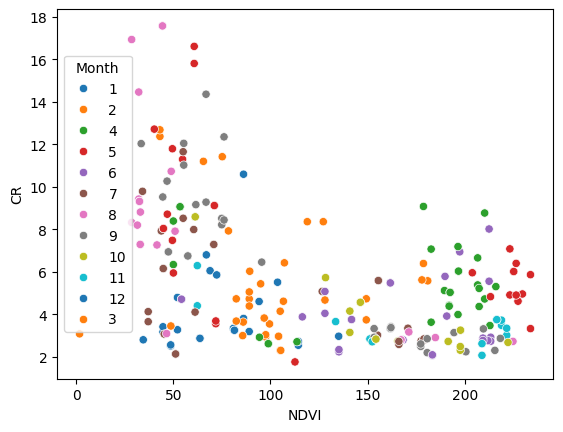

In [7]:
CatiCombined['Month'] = CatiCombined['Date'].dt.month.astype(str)

sns.scatterplot(data=CatiCombined, x="NDVI", y="CR", hue="Month", palette="tab10")

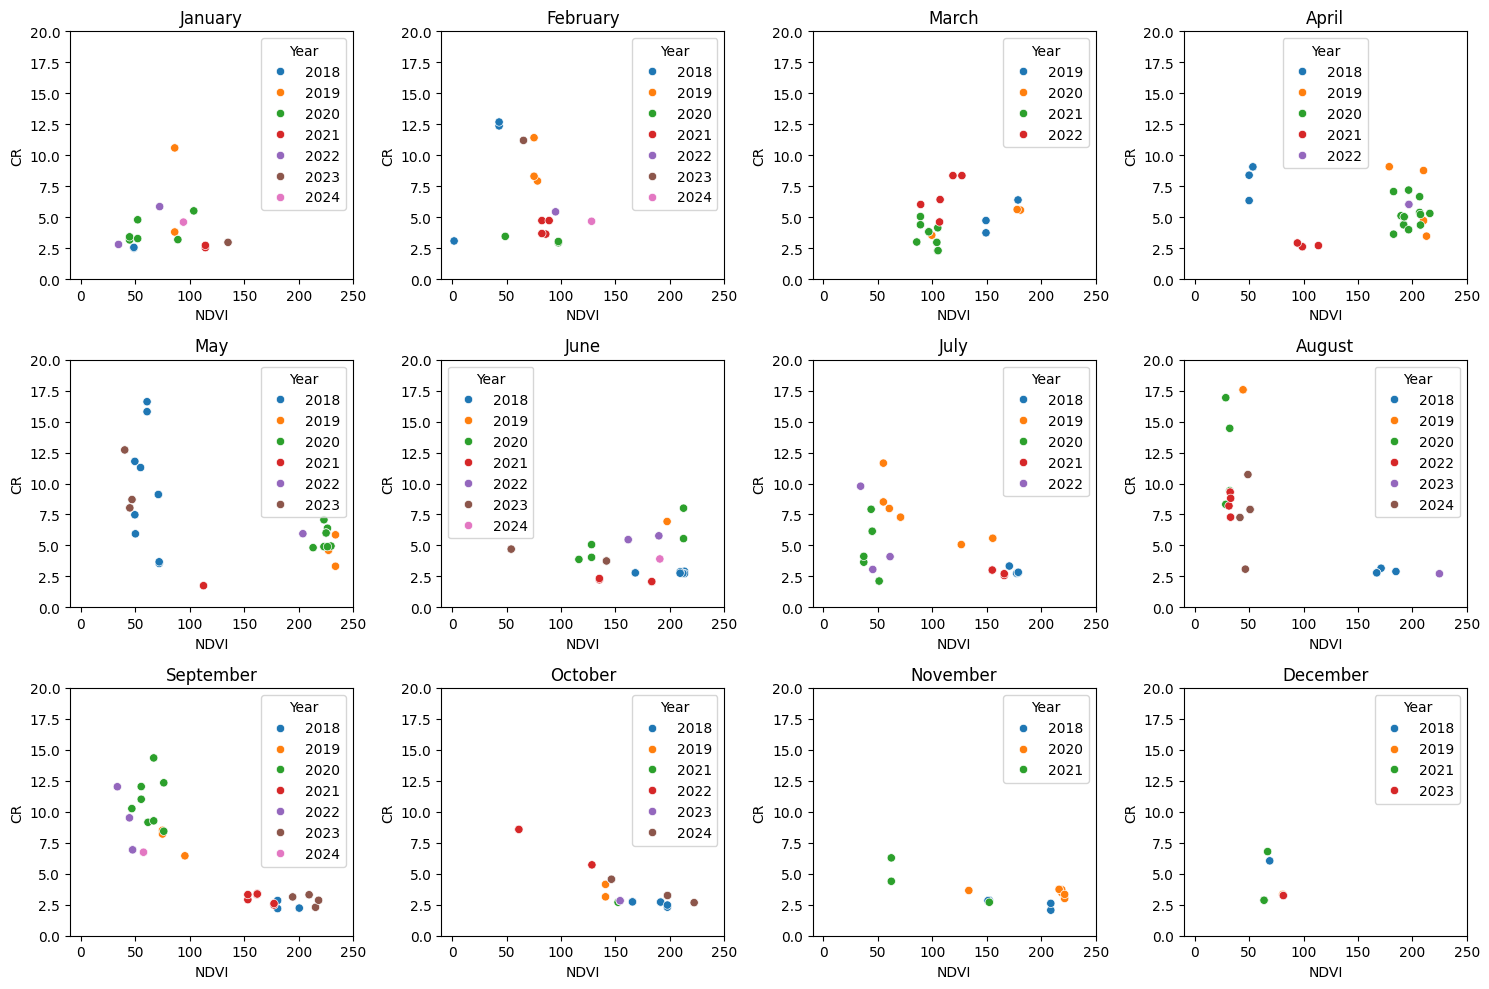

In [8]:
month_available = [i+1 for i in range(12)]
month_str = {1:"January", 2:"February", 3:"March", 4:"April", 5:"May", 6:"June", 7:"July", 8:"August", 9:"September", 10:"October", 11:"November", 12:"December"}
fig, axes = plt.subplots(3, 4, figsize=(15, 10))
CatiCombined['Year'] = CatiCombin

ed['Date'].dt.year.astype(str)

for idx, m in enumerate(month_available):
    
    current_df = CatiCombined[CatiCombined['Month'] == str(m)]
    row, col = divmod(idx, 4)
    
    sns.scatterplot(current_df, x='NDVI', y='CR', ax=axes[row, col], hue="Year")
    
    axes[row, col].set_title(month_str[m])
    axes[row, col].set_ylim(0, 20)
    axes[row, col].set_xlim(-10, 250)

plt.tight_layout()
plt.show()

In [50]:
CatiCombined.head()

,Date,NDVI,VV,VH,CR,Month,Year,Cluster
0,2018-01-13,48.656635,190.601148,76.114637,2.504133,1,2018,0
1,2018-01-14,48.656635,201.665069,78.930706,2.554963,1,2018,0
2,2018-02-10,1.767717,190.990162,62.108662,3.075097,2,2018,0
3,2018-02-24,43.107995,129.782180,10.494550,12.366626,2,2018,2
4,2018-02-25,43.107995,112.689836,8.888889,12.677606,2,2018,2


In [49]:
CatiCombined.describe()

,Date,NDVI,VV,VH,CR,Cluster
count,257,257.000000,257.000000,257.000000,257.000000,257.000000
mean,2020-10-26 14:34:05.136186880,122.964075,135.051629,34.640000,5.447808,1.661479
min,2018-01-13 00:00:00,1.767717,42.914245,5.618803,1.752872,0.000000
25%,2019-05-15 00:00:00,60.752722,111.238248,14.491923,2.961835,1.000000
50%,2020-07-27 00:00:00,114.325971,140.426949,30.668037,4.560454,2.000000
75%,2021-12-31 00:00:00,182.678991,161.653487,54.017473,7.074304,3.000000
max,2024-10-24 00:00:00,233.800326,201.665069,90.977081,17.569600,3.000000
std,NaN,64.945173,33.799738,21.652855,3.172463,1.120736


---
# Cluster Machine Learning
---

In [10]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [11]:
feature = CatiCombined.drop(columns=['Date'], errors='ignore')
feature.head()

,NDVI,VV,VH,CR,Month,Year
0,48.656635,190.601148,76.114637,2.504133,1,2018
1,48.656635,201.665069,78.930706,2.554963,1,2018
2,1.767717,190.990162,62.108662,3.075097,2,2018
3,43.107995,129.782180,10.494550,12.366626,2,2018
4,43.107995,112.689836,8.888889,12.677606,2,2018


In [12]:
scaler = StandardScaler()
feature_scaled = scaler.fit_transform(feature)

In [13]:
inertia = []
K_list = [i for i in range(1, 11)]
for k in K_list:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(feature_scaled)
    inertia.append(kmeans.inertia_)


/home/mathys/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/mathys/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


/home/mathys/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/mathys/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/mathys/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/mathys/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' 

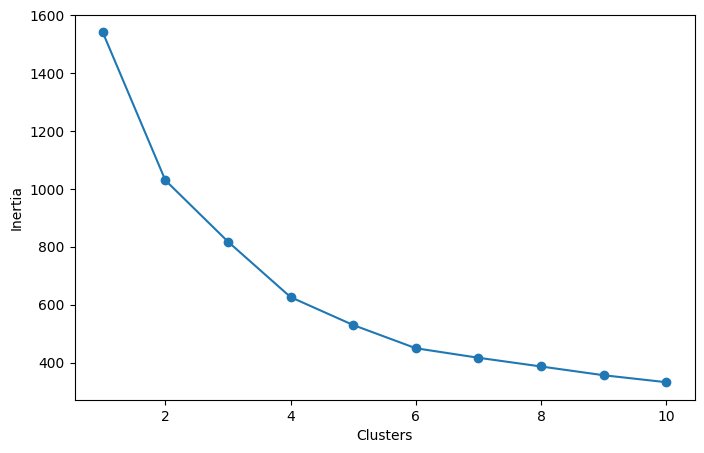

In [14]:
plt.figure(figsize=(8, 5))
plt.plot(K_list, inertia, marker='o')
plt.xlabel('Clusters')
plt.ylabel('Inertia')
plt.show()

In [15]:
optimal_k = 4
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
kmeans.fit(feature_scaled)

/home/mathys/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=4, random_state=42)

In [16]:
CatiCombined['Cluster'] = kmeans.labels_

/home/mathys/.local/lib/python3.10/site-packages/seaborn/_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/home/mathys/.local/lib/python3.10/site-packages/seaborn/_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/home/mathys/.local/lib/python3.10/site-packages/seaborn/_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/home/mathys/.local/lib/python3.10/site-packages/seabor

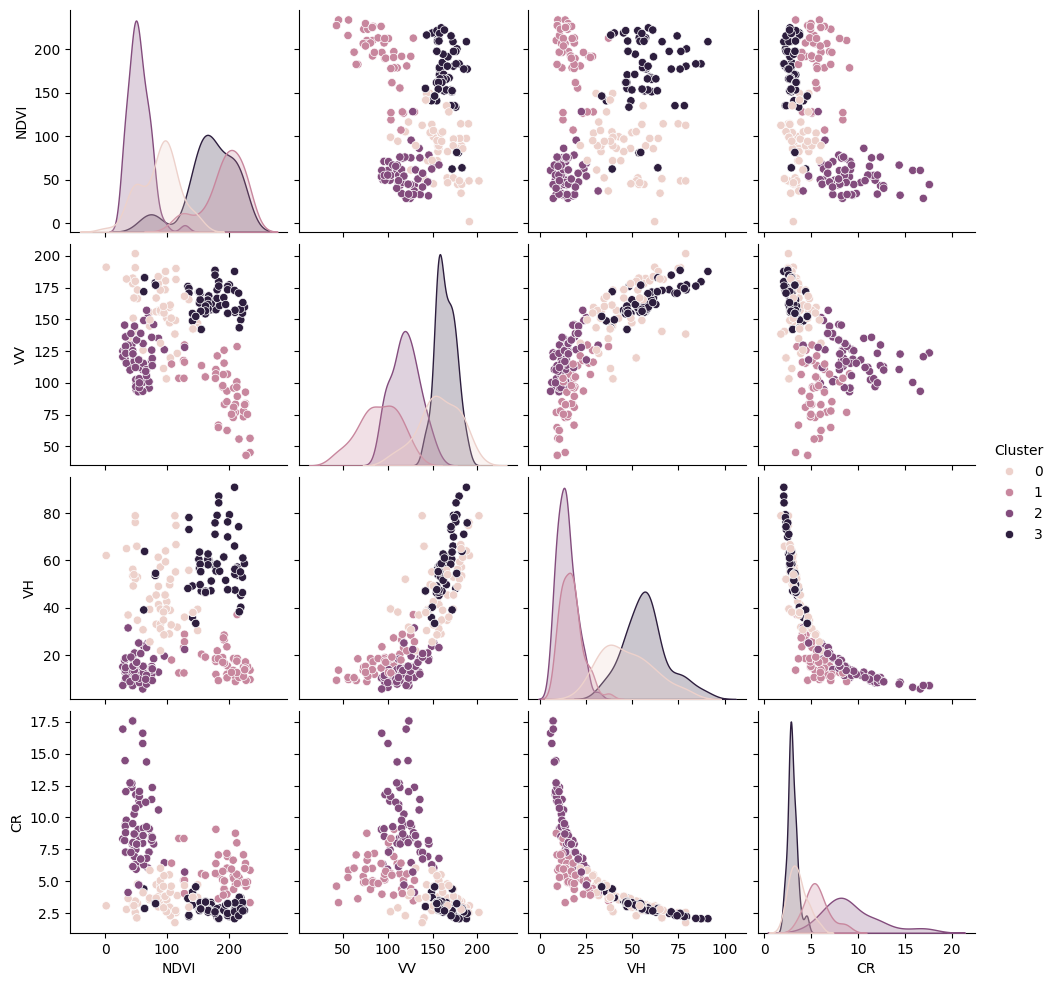

In [17]:
sns.pairplot(CatiCombined, hue='Cluster', vars=['NDVI', 'VV', 'VH', 'CR'])
plt.show()

### Random Forest classifier

In [18]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [19]:
X = CatiCombined.drop(columns=['Cluster', 'Date', 'Month', "Year"], errors='ignore')
y = CatiCombined['Cluster']
dates = CatiCombined['Date']

In [20]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [21]:
X_train, X_test, y_train, y_test, dates_train, dates_test = train_test_split(X_scaled, y, dates, test_size=0.2, random_state=42, stratify=y)

In [22]:
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [23]:
y_pred = clf.predict(X_test)

In [24]:
result_df = pd.DataFrame({
    'Date': dates_test,
    'Predicted Cluster': y_pred 
}).reset_index(drop=True)

In [25]:
result_df.head()

,Date,Predicted Cluster
0,2020-04-07,1
1,2021-12-31,3
2,2021-05-29,0
3,2018-05-03,2
4,2019-03-22,0


### Comparing Prediction and RGB

In [26]:
from Datasets import extract_sentinel2
import os

In [27]:
catillon_roi = [[ 2.3703110742853255, 49.51292627390305 ],
                [ 2.370971146551426 , 49.512947460881065],
                [ 2.3717096053418345, 49.51387540856808 ],
                [ 2.3725654276000228, 49.51394410794967 ],
                [ 2.3735336940326306, 49.514016556731804],
                [ 2.3751526501201994, 49.514142515077   ],
                [ 2.3758244449259394, 49.51546420864673 ],
                [ 2.376769892661855 , 49.5152595998436  ],
                [ 2.3769904971330504, 49.51489130184069 ],
                [ 2.377116556831197 , 49.51464576829835 ],
                [ 2.3789759373771346, 49.513868237281514],
                [ 2.379259571697787 , 49.51290653708338 ],
                [ 2.380394108901271 , 49.511944817954486],
                [ 2.3820959148246175, 49.511105856057725],
                [ 2.3703093330577474, 49.50963252229451 ],
                [ 2.3710026613964885, 49.51212897839622 ],
                [ 2.3703093330577474, 49.51292699896456 ]]

roi_name = "Catillon"
dir_Cati = "./Sentinel2_Images_Catillon/"

In [28]:
Cati_extractor = extract_sentinel2(catillon_roi, roi_name)

In [29]:
result_df.head()

,Date,Predicted Cluster
0,2020-04-07,1
1,2021-12-31,3
2,2021-05-29,0
3,2018-05-03,2
4,2019-03-22,0


In [30]:

for current_date_result in result_df["Date"]:
    fname = f'{current_date_result.strftime("%d_%m_%y")}_RGB.png'
    if fname in os.listdir(dir_Cati):
        pass
    else:
        date_result = (current_date_result.day, current_date_result.month, current_date_result.year)
        Cati_extractor.save(date_result, is_NDVI=False)

In [31]:
result_df.describe()

,Date,Predicted Cluster
count,52,52.000000
mean,2020-11-23 17:04:36.923076864,1.557692
min,2018-04-20 00:00:00,0.000000
25%,2019-08-26 06:00:00,0.000000
50%,2020-08-05 12:00:00,2.000000
75%,2021-09-18 12:00:00,3.000000
max,2024-10-03 00:00:00,3.000000
std,NaN,1.161700


In [32]:
def plot_prediction_images(predicted_df):
    num_images = len(predicted_df["Date"])
    num_row = num_images//5 + 1
    fig, axes = plt.subplots(num_row, 5, figsize=(15, num_row*3)) 
    axes = axes.flatten()

    for i, ax in enumerate(axes):
        if i < len(predicted_df):
            current_date_result = predicted_df["Date"].iloc[i]
            predicted_cluster = predicted_df["Predicted Cluster"].iloc[i]
            fname = os.path.join(dir_Cati, current_date_result.strftime("%d_%m_%y") + "_RGB.png")

            try:
                img = plt.imread(fname)
                ax.imshow(img)
                ax.set_title(f"Prediction: {predicted_cluster} ({month_str[current_date_result.month]})")
                ax.axis("off") 
            except FileNotFoundError:
                ax.set_title(f"Image not found for {current_date_result.strftime('%d_%m_%y')} at {fname}")
                ax.axis("off")

    plt.tight_layout()
    plt.show()


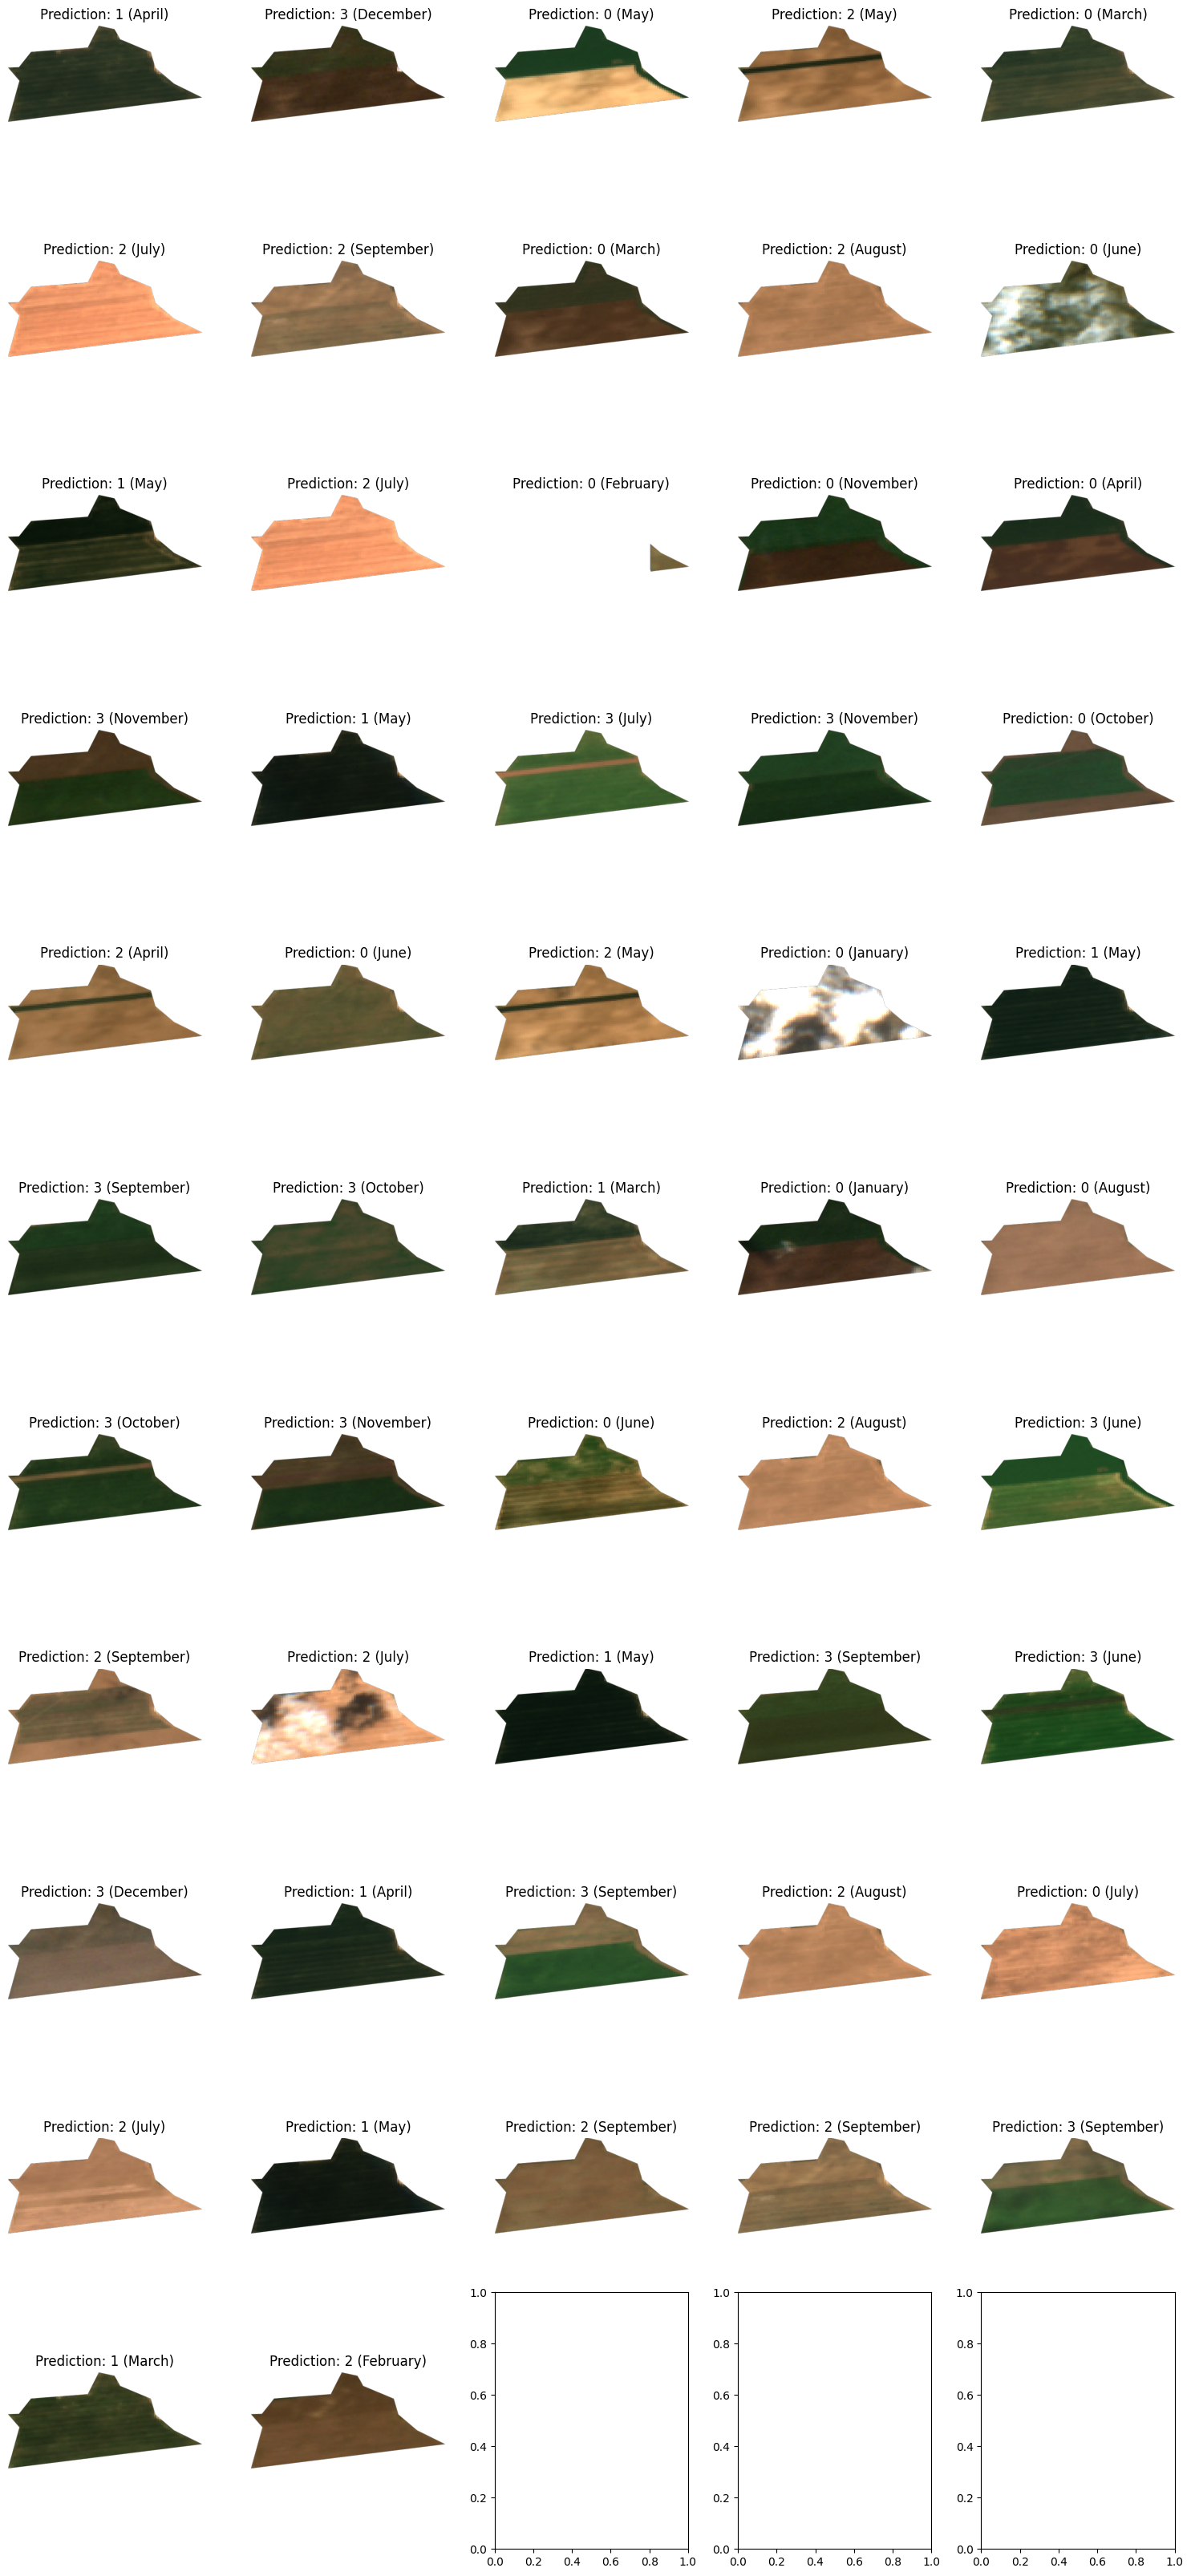

In [33]:
plot_prediction_images(result_df)

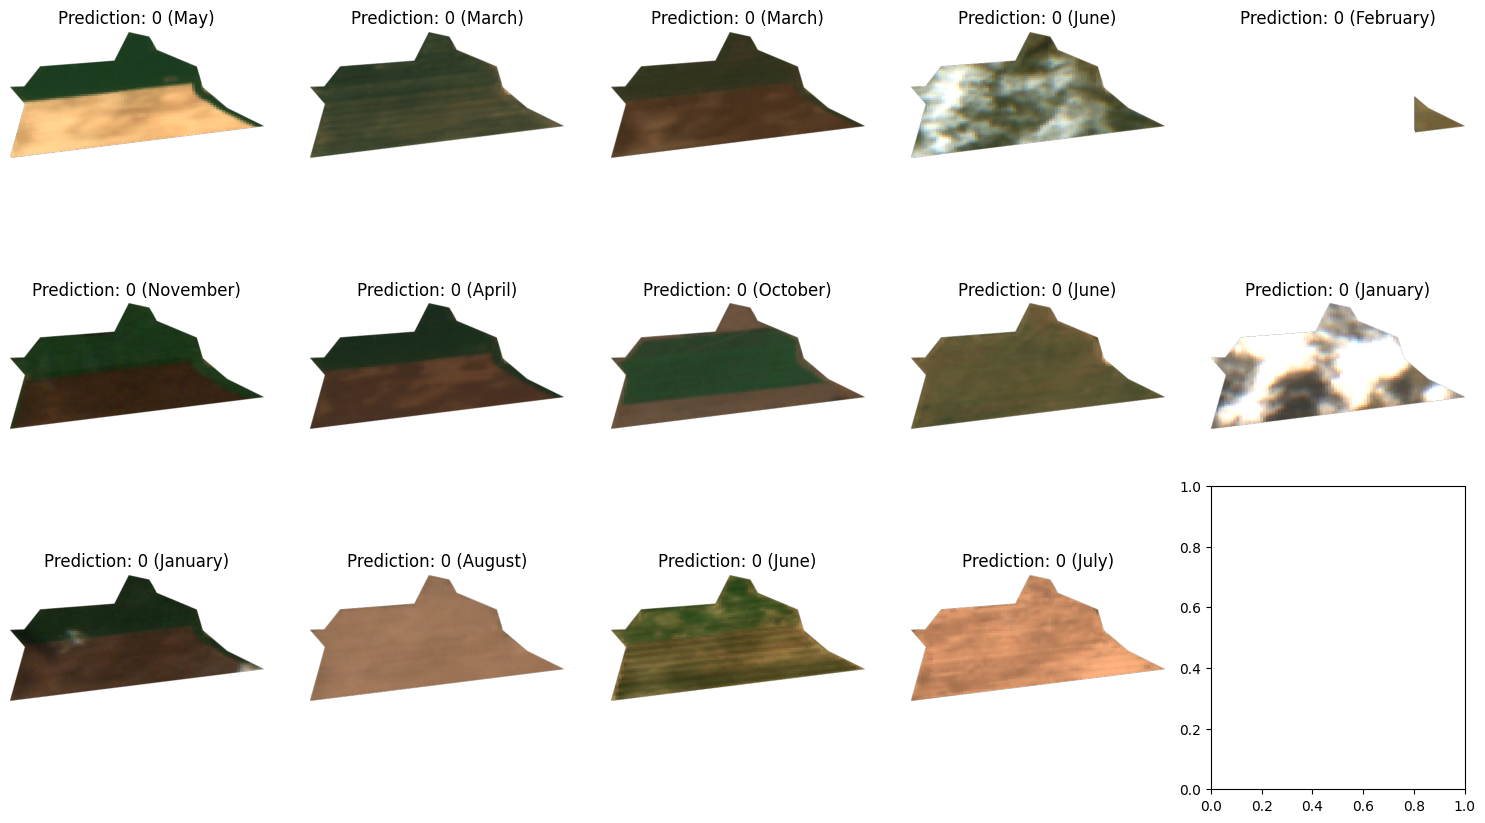

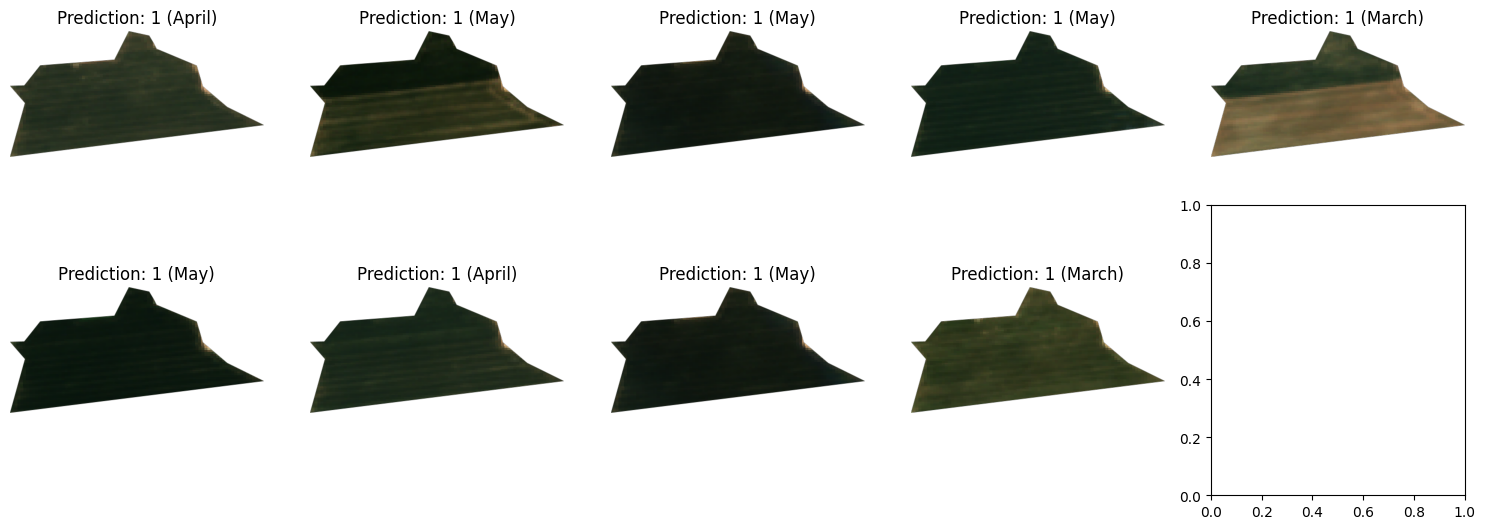

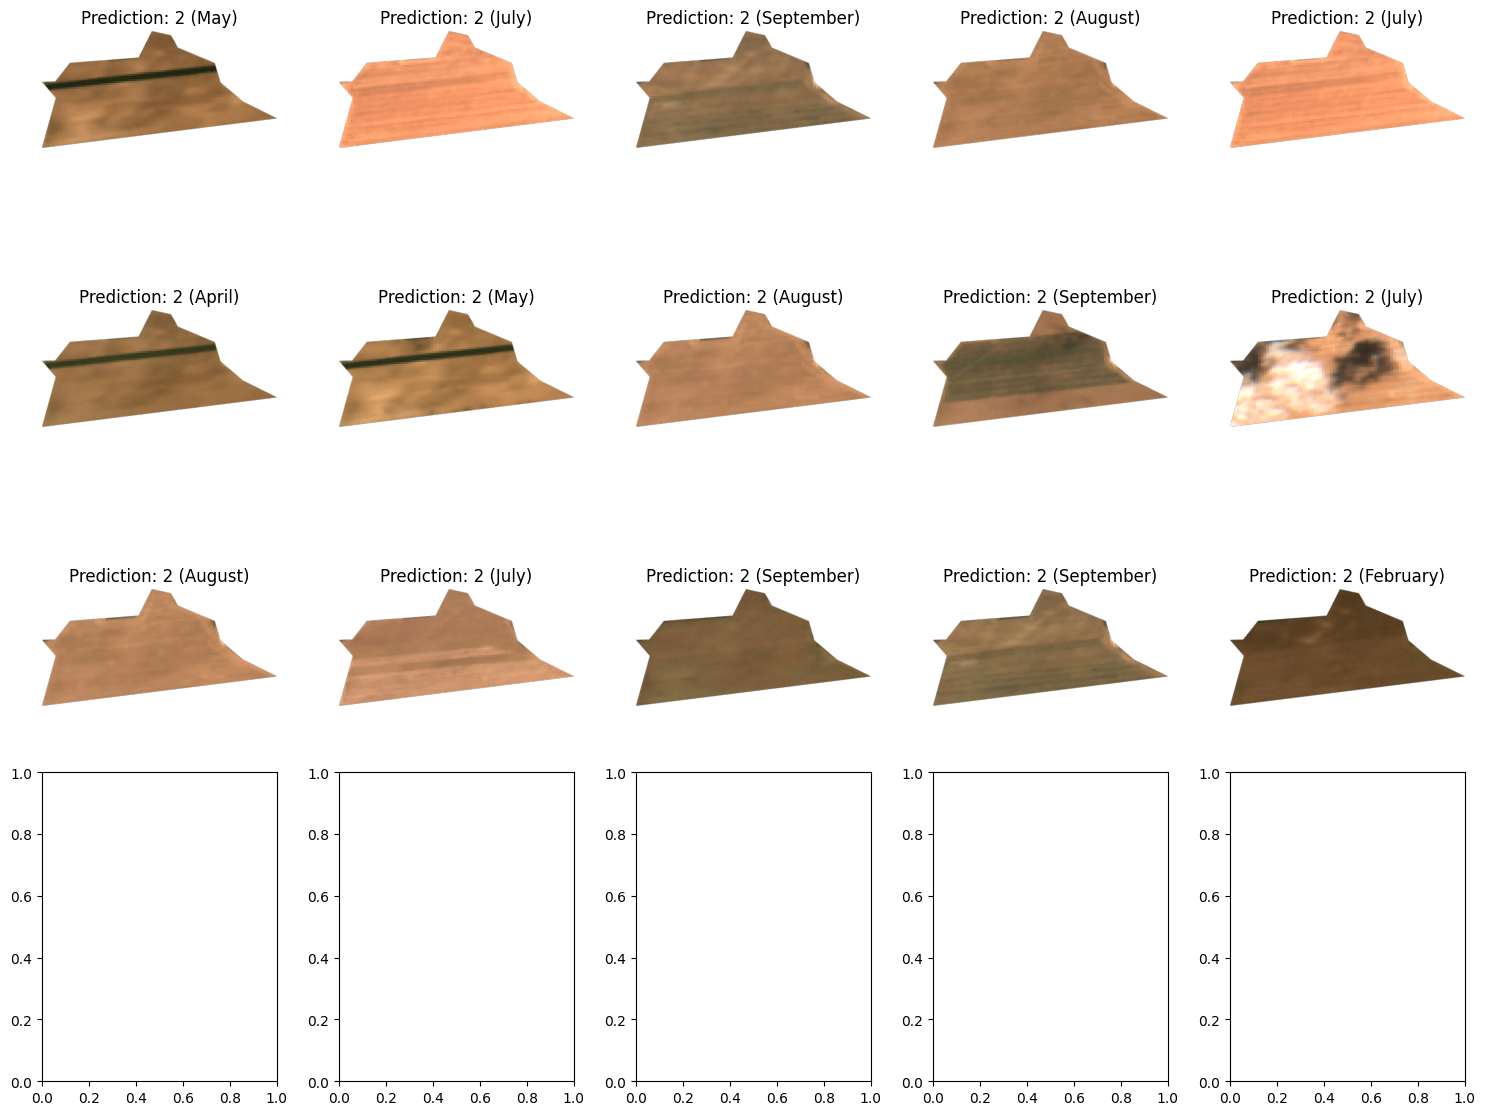

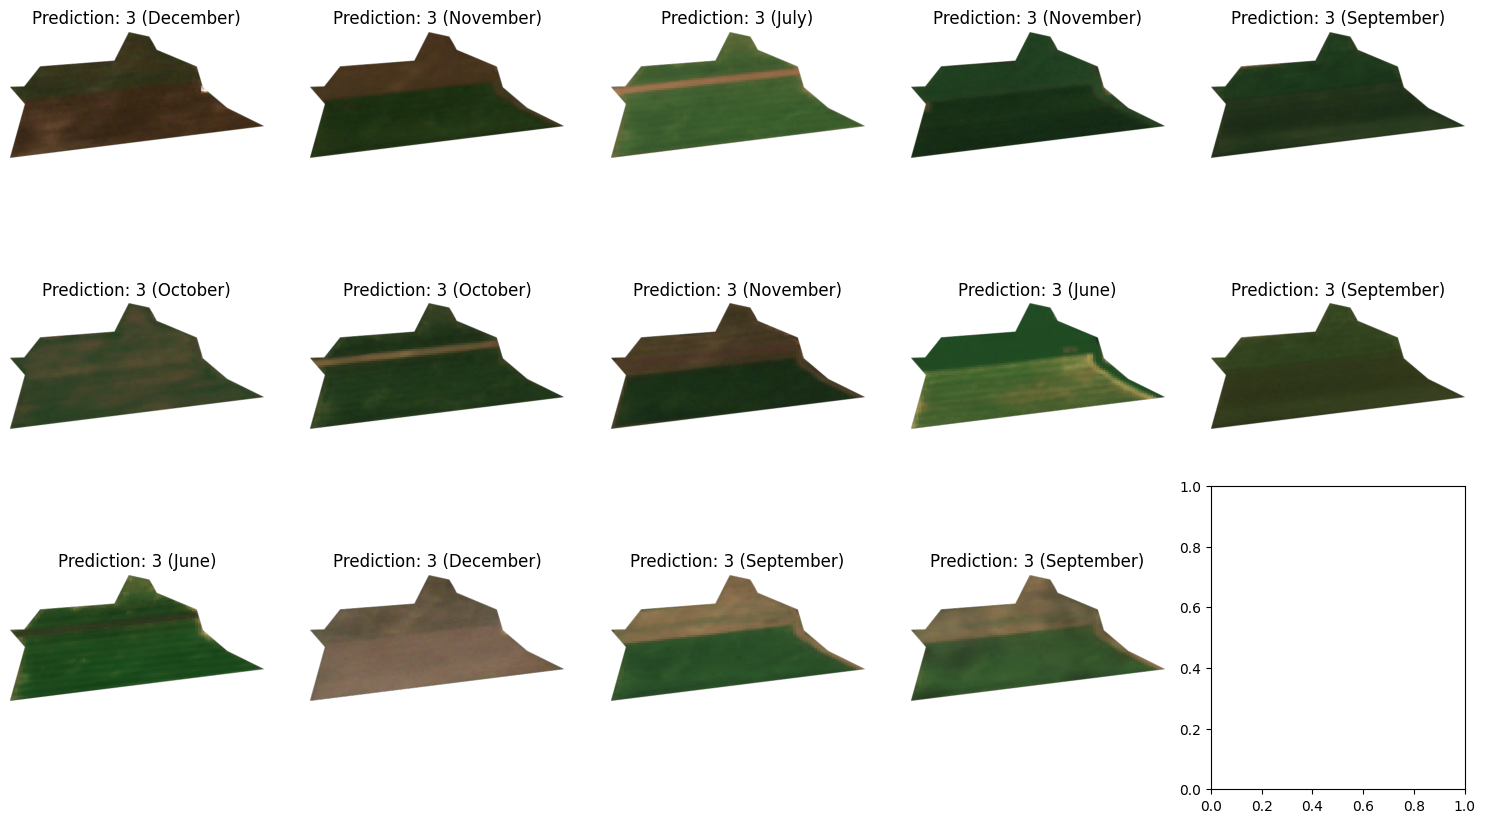

In [34]:
for k_cluster in range(optimal_k):
    plot_prediction_images(result_df[result_df["Predicted Cluster"]==k_cluster])

/home/mathys/.local/lib/python3.10/site-packages/seaborn/_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/home/mathys/.local/lib/python3.10/site-packages/seaborn/_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/home/mathys/.local/lib/python3.10/site-packages/seaborn/_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/home/mathys/.local/lib/python3.10/site-packages/seabor

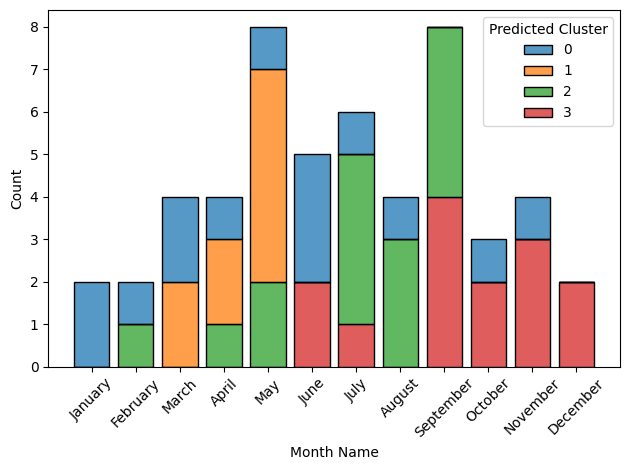

In [48]:
result_df['Month'] = result_df['Date'].dt.month
result_df['Month Name'] = result_df['Month'].map(month_str)
sns.histplot(data=result_df.sort_values(by='Month', ascending=True), x='Month Name', hue='Predicted Cluster', multiple='stack', shrink=0.8, palette='tab10')
plt.xticks(rotation=45)
plt.tight_layout()